# Preprocesamiento

Los datos fueron extraídos de la base de datos EnergiaSolar en SQL, donde primero se validaron la cantidad de nulos de cada una de las columnas de condiciones ambientales.
Se excluyeron aquellas variables donde el porcentaje de nulos rebasara el 30%, por los cuales se excluyeron las variables de Presión Atmosférica y la descripción categórica de Dirección del viento.

## Lecturas de datos

Una vez descartados los valores, leemos la información

In [5]:
import pandas as pd

generacion = pd.read_excel('Metodologia\Preprocesamiento\Preprocesamiento.xlsx', sheet_name="Datos en conjunto")
generacion.head()

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT
0,2021-06-22 01:00:00,6017,144384,0.0,1,6017,22,95,62.0,9.0,0.0,45.0,0.0,5,4,15,0.0,14.0
1,2021-06-22 02:00:00,6017,144385,0.0,2,6017,21,95,68.0,7.0,0.0,45.0,0.0,5,4,11,0.0,15.0
2,2021-06-22 03:00:00,6017,144386,0.0,3,6017,20,95,74.0,7.0,0.0,45.0,0.0,5,4,9,0.0,16.0
3,2021-06-22 04:00:00,6017,144387,0.0,4,6017,20,95,79.0,7.0,0.0,45.0,0.0,5,3,11,0.0,16.0
4,2021-06-22 05:00:00,6017,144388,0.0,5,6017,20,95,88.0,7.0,0.0,42.0,0.0,5,2,11,0.0,18.0


## Tratamiento de nulos

In [21]:
null_counts = generacion.isnull().sum()

# Mostrar los resultados
print(null_counts)

dtHora                     0
iCodDia                    0
iCodHora                   0
fltValPronostico           0
iNumHora                   0
iCodDia.1                  0
fltTemp                    0
fltProbabilidadLluvia      0
fltHumedadRelativa         2
fltVelocidadViento         0
fltDireccionViento       216
fltCoberturaNubes         96
fltIndiceUV               44
iCodCondCielo              0
iCodDirViento              0
fltVelocidadRafaga         0
fltPrecipitacion           0
fltDPT                     0
dtype: int64


### Generación de energía

In [4]:
generacion['is_null'] = generacion['fltValPronostico'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[24, 360, 1]


In [32]:
generacion[generacion['is_null'] == True]

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
1512,2021-08-24 01:00:00,6080,145896,NaN,1,6080,17,5,83.0,11.0,0.0,37.0,0.0,3,4,17,0.0,14.0,True,2
1513,2021-08-24 02:00:00,6080,145897,NaN,2,6080,16,6,85.0,9.0,0.0,49.0,0.0,3,4,13,0.0,14.0,True,2
1514,2021-08-24 03:00:00,6080,145898,NaN,3,6080,16,7,87.0,7.0,0.0,61.0,0.0,3,4,11,0.0,14.0,True,2
1515,2021-08-24 04:00:00,6080,145899,NaN,4,6080,15,7,88.0,7.0,0.0,73.0,0.0,3,4,9,0.0,13.0,True,2
1516,2021-08-24 05:00:00,6080,145900,NaN,5,6080,15,7,90.0,7.0,0.0,85.0,0.0,4,4,9,0.0,13.0,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,2021-10-05 21:00:00,6122,146924,NaN,21,6122,18,20,83.0,15.0,0.0,70.0,0.0,3,4,20,0.0,15.0,True,4
2541,2021-10-05 22:00:00,6122,146925,NaN,22,6122,17,20,86.0,13.0,0.0,70.0,0.0,3,4,19,0.0,15.0,True,4
2542,2021-10-05 23:00:00,6122,146926,NaN,23,6122,16,20,87.0,11.0,0.0,70.0,0.0,3,4,17,0.0,14.0,True,4
2543,2021-10-06 00:00:00,6122,146927,NaN,24,6122,16,20,91.0,11.0,0.0,70.0,0.0,3,4,15,0.0,14.0,True,4


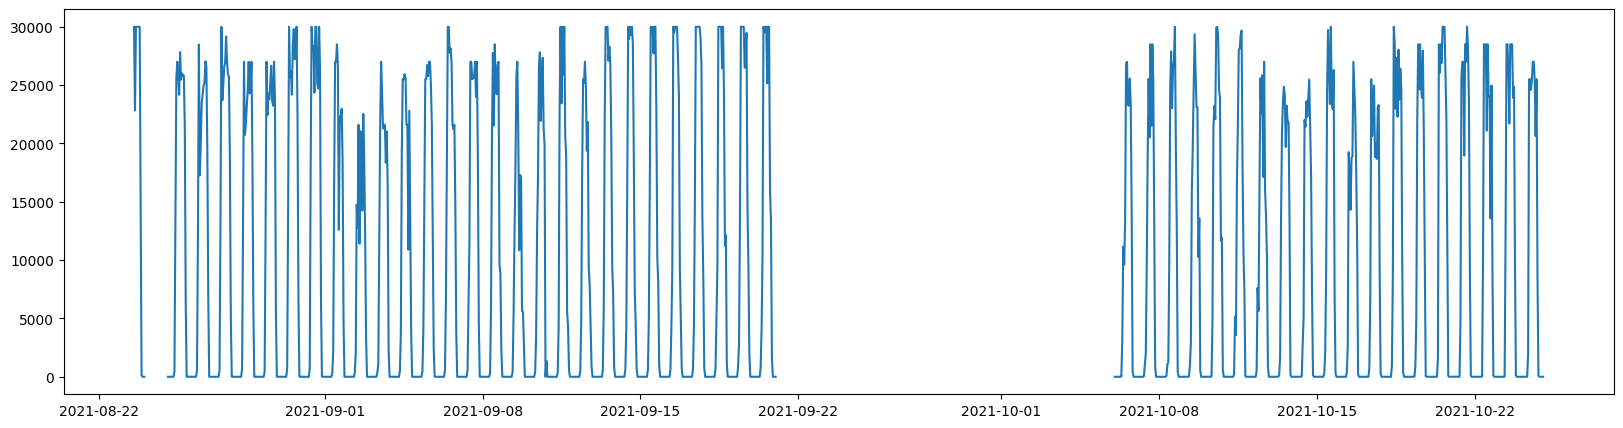

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 1500
fin = 3000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltValPronostico"])

C:\Users\Claudia\AppData\Local\Temp\ipykernel_22092\202913393.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = generacion[['dtHora','fltValPronostico']].fillna(method="ffill")


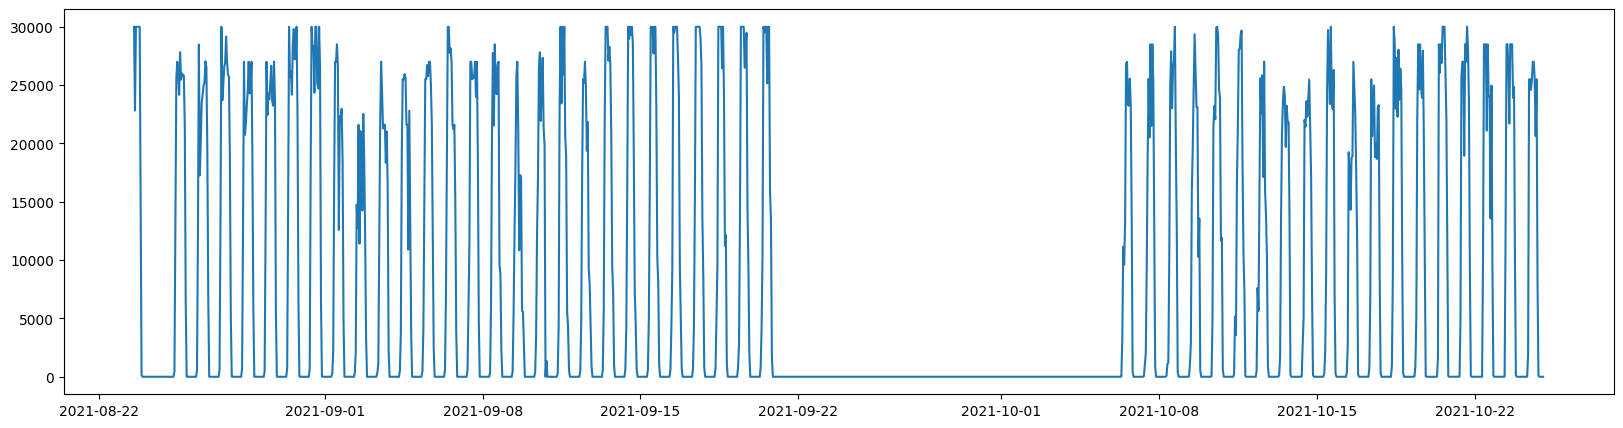

In [15]:
# Apply the forward fill method
df_imputed = generacion[['dtHora','fltValPronostico']].fillna(method="ffill")
plt.figure(figsize=(20,5))
ini = 1500
fin = 3000
plt.plot(df_imputed.loc[ini:fin, "dtHora"], df_imputed.loc[ini:fin, "fltValPronostico"])

C:\Users\Claudia\AppData\Local\Temp\ipykernel_22092\1622421886.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = generacion[['dtHora','fltValPronostico']].fillna(method="bfill")


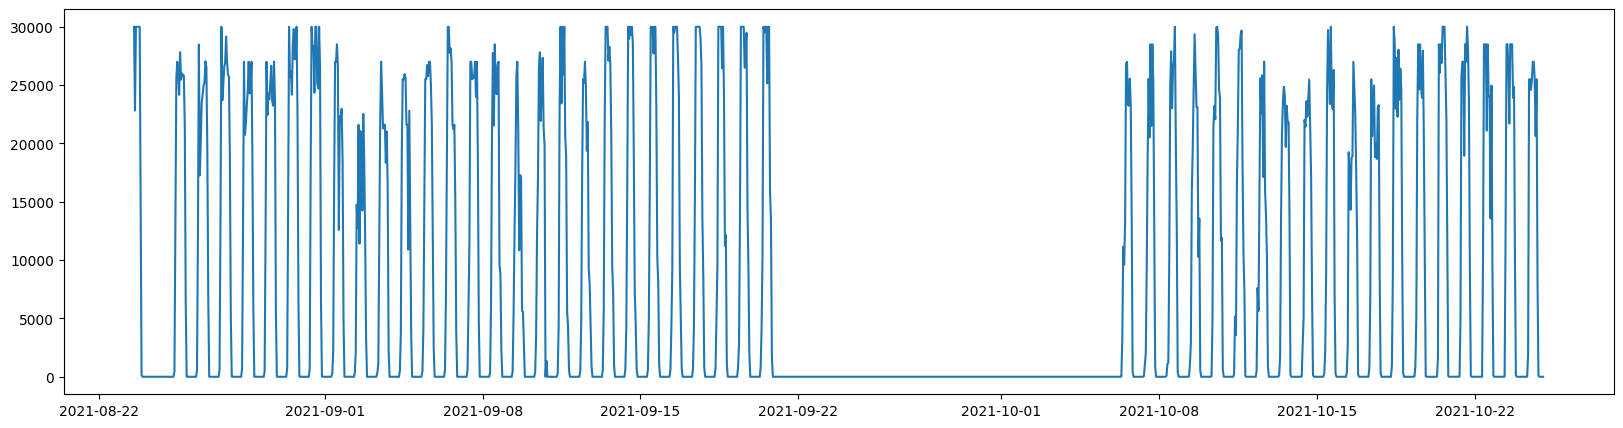

In [16]:
# Apply the forward fill method
df_imputed = generacion[['dtHora','fltValPronostico']].fillna(method="bfill")
plt.figure(figsize=(20,5))
ini = 1500
fin = 3000
plt.plot(df_imputed.loc[ini:fin, "dtHora"], df_imputed.loc[ini:fin, "fltValPronostico"])

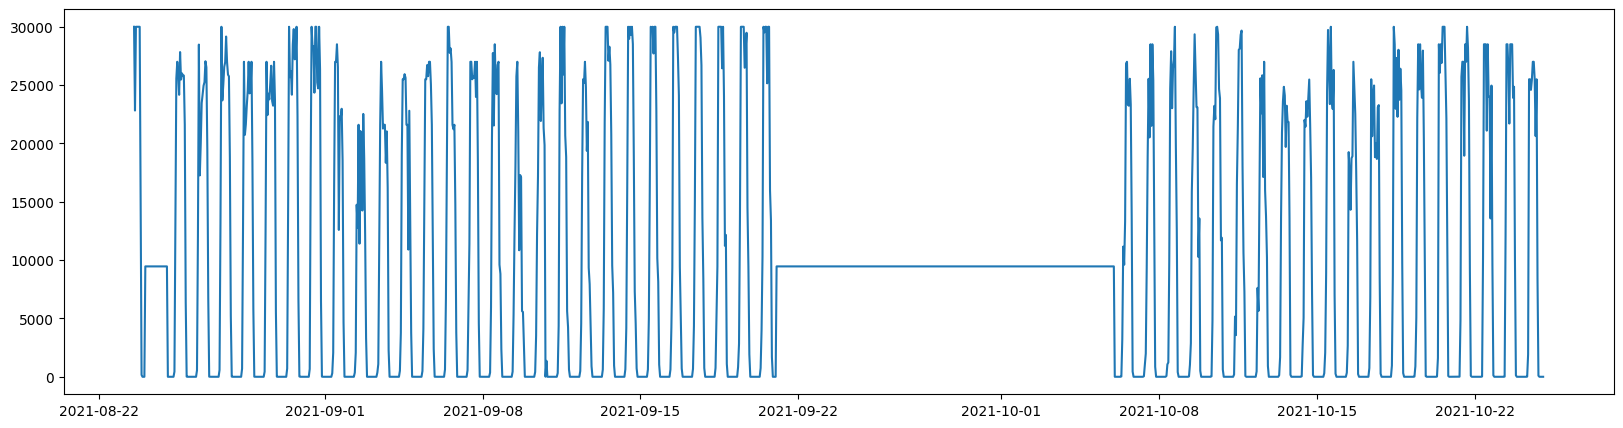

In [17]:
# Apply the forward fill method
df_imputed = generacion[['dtHora','fltValPronostico']].fillna(generacion['fltValPronostico'].mean())
plt.figure(figsize=(20,5))
ini = 1500
fin = 3000
plt.plot(df_imputed.loc[ini:fin, "dtHora"], df_imputed.loc[ini:fin, "fltValPronostico"])

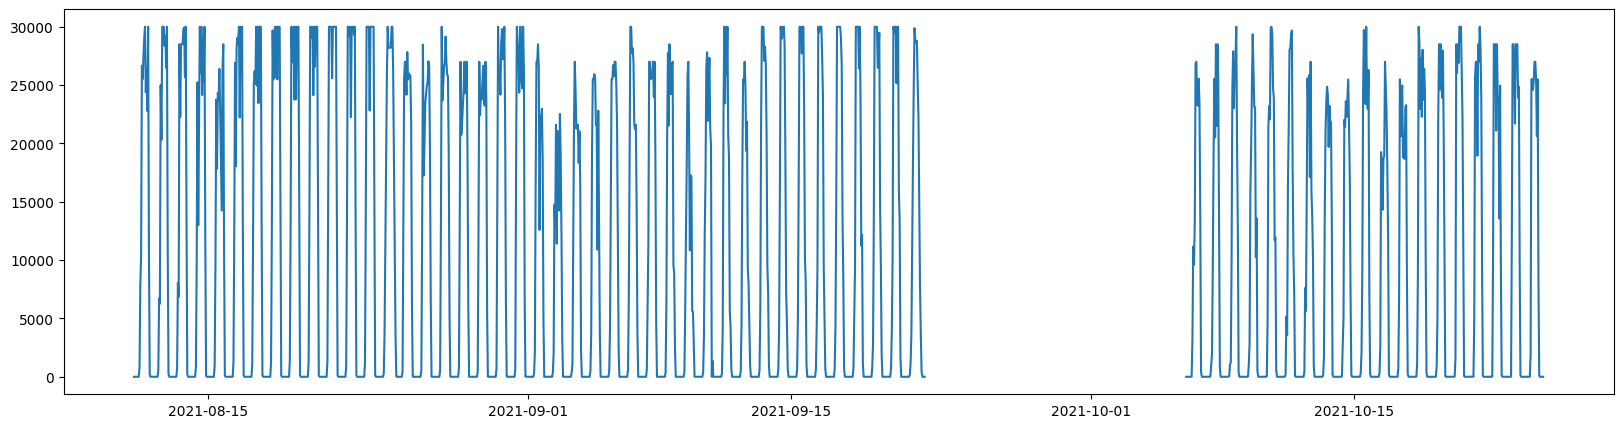

In [58]:
# Make a copy of the original DataFrame
df_copy = generacion[['dtHora', 'fltValPronostico']].copy()

# Mark the missing values before imputation
imputed_indices = df_copy[df_copy['fltValPronostico'].isnull()].index


# Apply the rolling mean imputation method
df_copy['fltValPronostico'] = df_copy['fltValPronostico'].fillna(df_copy['fltValPronostico'].rolling(window=4, min_periods=1).mean().shift(24))

plt.figure(figsize=(20,5))
ini = 1200
fin = 3000
plt.plot(df_copy.loc[ini:fin, "dtHora"], df_copy.loc[ini:fin, "fltValPronostico"])

#Para el de 24 horas está excelente, para el de 15 días no

El hueco de 1 hora se interpola.
El hueco de 24 horas se aplicará mooving average de 24 horas atrás.
El hueco de 360 horas se aplicará mooving average de 15 días atrás.

In [43]:
# Función para aplicar diferentes métodos según el tamaño del hueco
def fill_missing_values(df, huecos, column):
    for group, size in huecos.items():
        idx = df[df['group'] == group].index  # Obtener índices del hueco

        if size <= 12:
            # Interpolación spline (orden 2)
            df.loc[idx, column] = df[column].interpolate(method='spline', order=2)
        
        elif 13 <= size <= 30:
            # Promedio móvil de 24 horas atrás
            df.loc[idx, column] = df[column].rolling(window=4, min_periods=1).mean().shift(24)
        
        else:
            # Promedio móvil de 1 año después (porque ya sé que el hueco está muy temprano y prefiero obtener el dato estacional el año siguiente)
            df.loc[idx, column] = df[column].rolling(window=2, min_periods=1).mean().shift(-8760)

In [15]:
import numpy as np

# Copiar el DataFrame para no modificar el original
df_copy = generacion[['dtHora', 'fltValPronostico']].copy()

df_copy['is_null'] = df_copy['fltValPronostico'].isna()
df_copy['group'] = (df_copy['is_null'] != df_copy['is_null'].shift()).cumsum()

# Contar la longitud de cada hueco
huecos = df_copy[df_copy['is_null']].groupby('group').size()

# Aplicar la función al DataFrame
fill_missing_values(df_copy, huecos, 'fltValPronostico')

# Eliminar columnas auxiliares
df_copy.drop(columns=['is_null', 'group'], inplace=True)

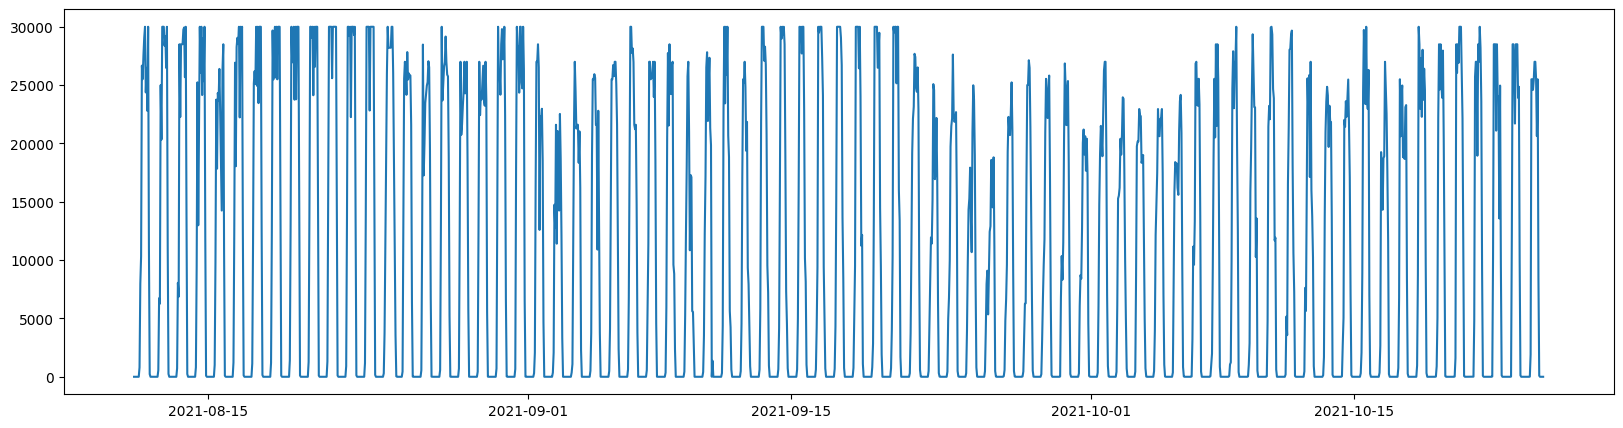

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 1200
fin = 3000
plt.plot(df_copy.loc[ini:fin, "dtHora"], df_copy.loc[ini:fin, "fltValPronostico"])

In [17]:
generacion['fltValPronostico'] = df_copy['fltValPronostico']

In [20]:
len(generacion[generacion['fltValPronostico'].isna() == True])

0

### Humedad relativa

In [22]:
generacion['is_null'] = generacion['fltHumedadRelativa'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[1, 1]


Como solo hay dos huecos aislados, interpolamos directamente

In [23]:
generacion[generacion['is_null'] == True]

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
6716,2022-03-30 20:00:00,6298,151148,105.640091,20,6298,26,0,NaN,20.0,0.0,27.0,0.0,1,6,43,0.0,43.0,True,2
6786,2022-04-02 18:00:00,6301,151218,18705.413894,18,6301,31,0,NaN,17.0,0.0,54.0,1.0,3,4,32,0.0,40.0,True,4


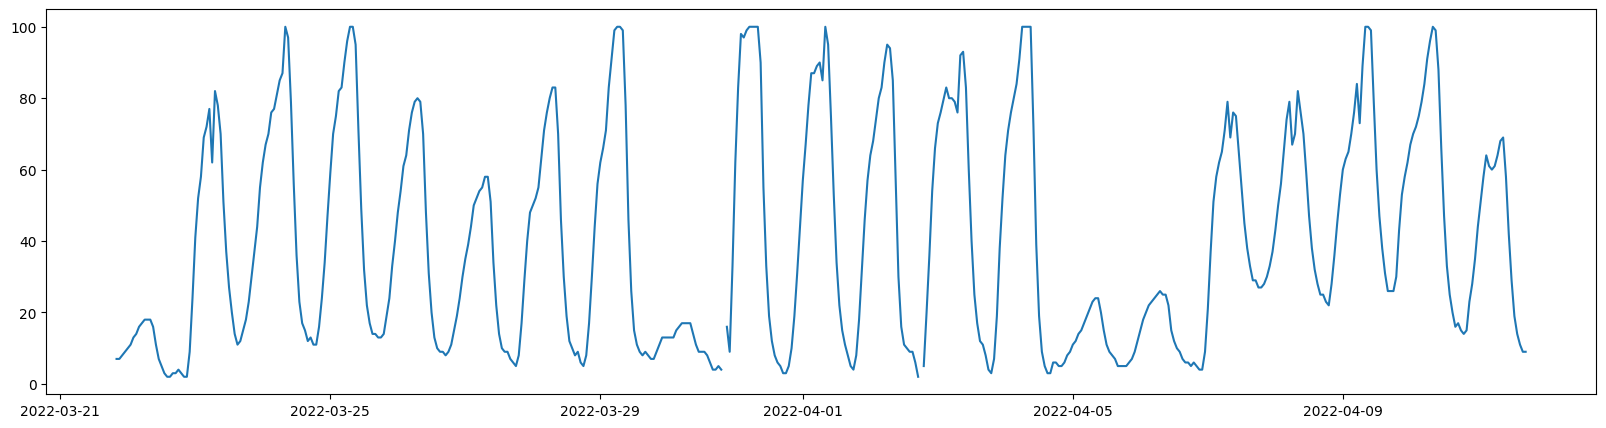

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 6500
fin = 7000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltHumedadRelativa"])

In [26]:

generacion['fltHumedadRelativa'] = generacion['fltHumedadRelativa'].interpolate(method='linear')

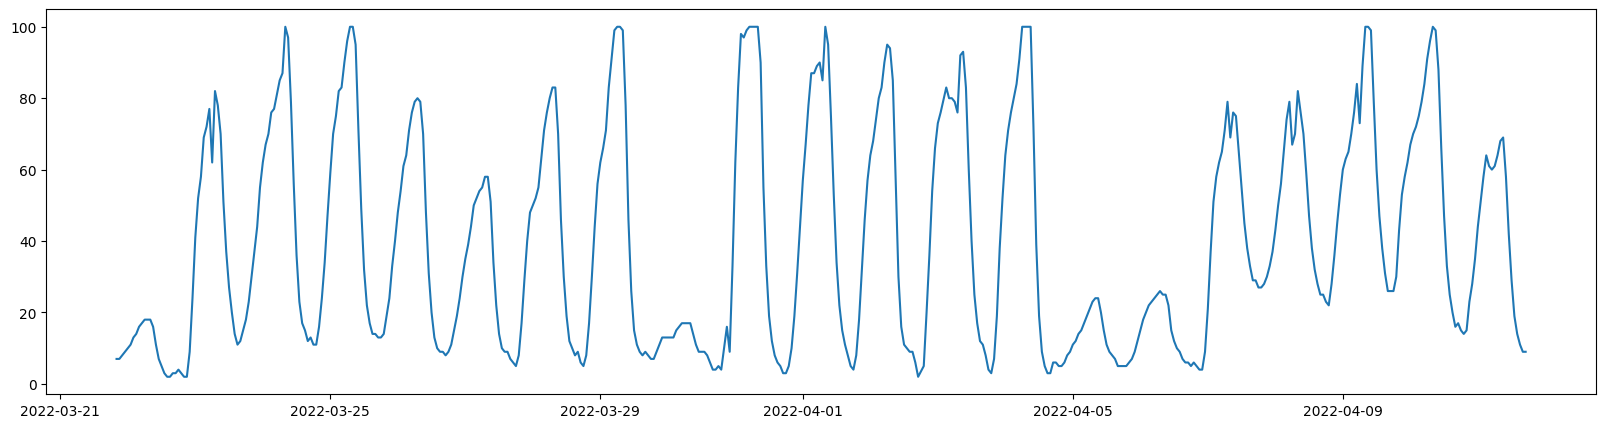

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 6500
fin = 7000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltHumedadRelativa"])

### Dirección del viento

In [28]:
generacion['is_null'] = generacion['fltDireccionViento'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[216]


In [29]:
generacion[generacion['is_null'] == True]

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
21313,2023-12-01 01:00:00,6909,165793,0.0,1,6909,13,0,65.0,6.0,NaN,50.0,0.0,3,7,12,0.0,6.0,True,2
21314,2023-12-01 02:00:00,6909,165794,0.0,2,6909,12,0,68.0,5.0,NaN,48.0,0.0,3,6,12,0.0,7.0,True,2
21315,2023-12-01 03:00:00,6909,165795,0.0,3,6909,12,0,73.0,6.0,NaN,50.0,0.0,3,7,12,0.0,7.0,True,2
21316,2023-12-01 04:00:00,6909,165796,0.0,4,6909,11,0,76.0,5.0,NaN,48.0,0.0,3,7,12,0.0,7.0,True,2
21317,2023-12-01 05:00:00,6909,165797,0.0,5,6909,10,0,79.0,3.0,NaN,49.0,0.0,3,7,12,0.0,7.0,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21524,2023-12-09 20:00:00,6917,166004,0.0,20,6917,18,0,52.0,5.0,NaN,13.0,0.0,1,3,12,0.0,8.0,True,2
21525,2023-12-09 21:00:00,6917,166005,0.0,21,6917,16,0,60.0,4.0,NaN,20.0,0.0,2,4,13,0.0,8.0,True,2
21526,2023-12-09 22:00:00,6917,166006,0.0,22,6917,16,0,61.0,3.0,NaN,20.0,0.0,2,4,10,0.0,8.0,True,2
21527,2023-12-09 23:00:00,6917,166007,0.0,23,6917,16,0,62.0,3.0,NaN,5.0,0.0,1,4,8,0.0,8.0,True,2


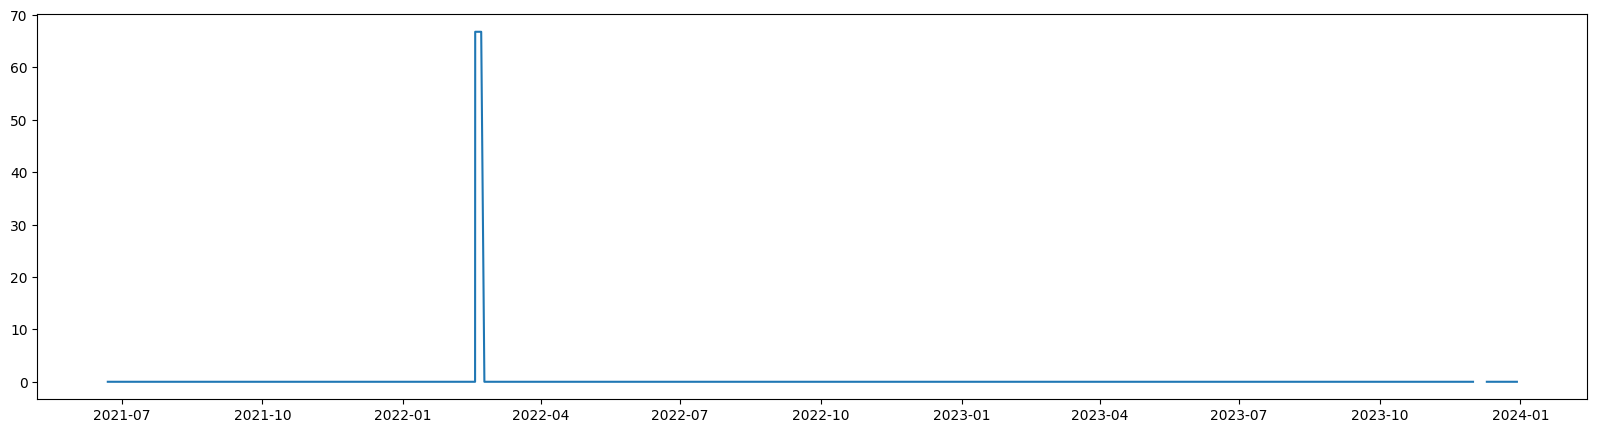

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 0
fin = 22000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltDireccionViento"])

Al descubrir de que, a pesar que hay pocos nulos, en su mayoría es 0, por lo que muy seguramente el dato está erróneo y cuando no lo detecta es nulo, por lo que vamos a descartar la variable.

### Cobertura de Nubes

In [36]:
generacion['is_null'] = generacion['fltCoberturaNubes'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[96]


In [37]:
generacion[generacion['is_null'] == True]

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
5761,2022-02-17 01:00:00,6257,150145,0.000000,1,6257,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5762,2022-02-17 02:00:00,6257,150146,0.000000,2,6257,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5763,2022-02-17 03:00:00,6257,150147,0.000000,3,6257,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5764,2022-02-17 04:00:00,6257,150148,0.000000,4,6257,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5765,2022-02-17 05:00:00,6257,150149,0.000000,5,6257,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,2022-02-20 20:00:00,6260,150236,4.429462,20,6260,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5853,2022-02-20 21:00:00,6260,150237,0.000000,21,6260,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5854,2022-02-20 22:00:00,6260,150238,0.000000,22,6260,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2
5855,2022-02-20 23:00:00,6260,150239,0.000000,23,6260,13,0,73.2,2.9,66.8,NaN,0.0,1,2,4,0.0,17.19,True,2


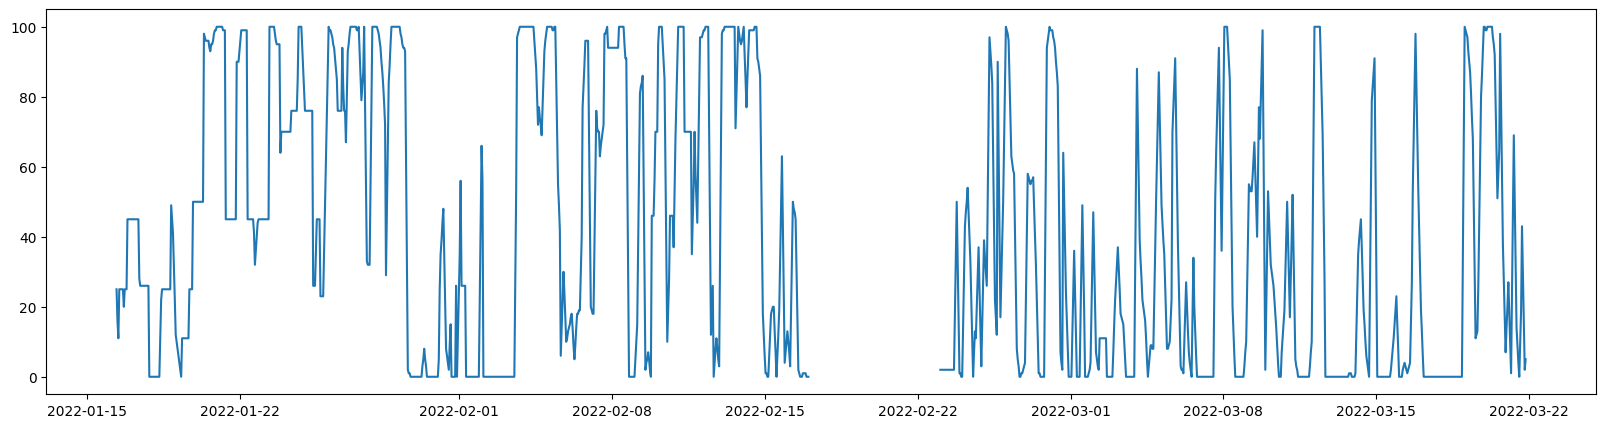

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 5000
fin = 6500
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltCoberturaNubes"])

Al ser un hueco relativamente grande, vamos a usar el mooving average de un año atrás

In [44]:
df_copy = generacion[['dtHora', 'fltCoberturaNubes']].copy()

df_copy['is_null'] = df_copy['fltCoberturaNubes'].isna()
df_copy['group'] = (df_copy['is_null'] != df_copy['is_null'].shift()).cumsum()

# Contar la longitud de cada hueco
huecos = df_copy[df_copy['is_null']].groupby('group').size()

# Aplicar la función al DataFrame
fill_missing_values(df_copy, huecos, 'fltCoberturaNubes')

# Eliminar columnas auxiliares
df_copy.drop(columns=['is_null', 'group'], inplace=True)

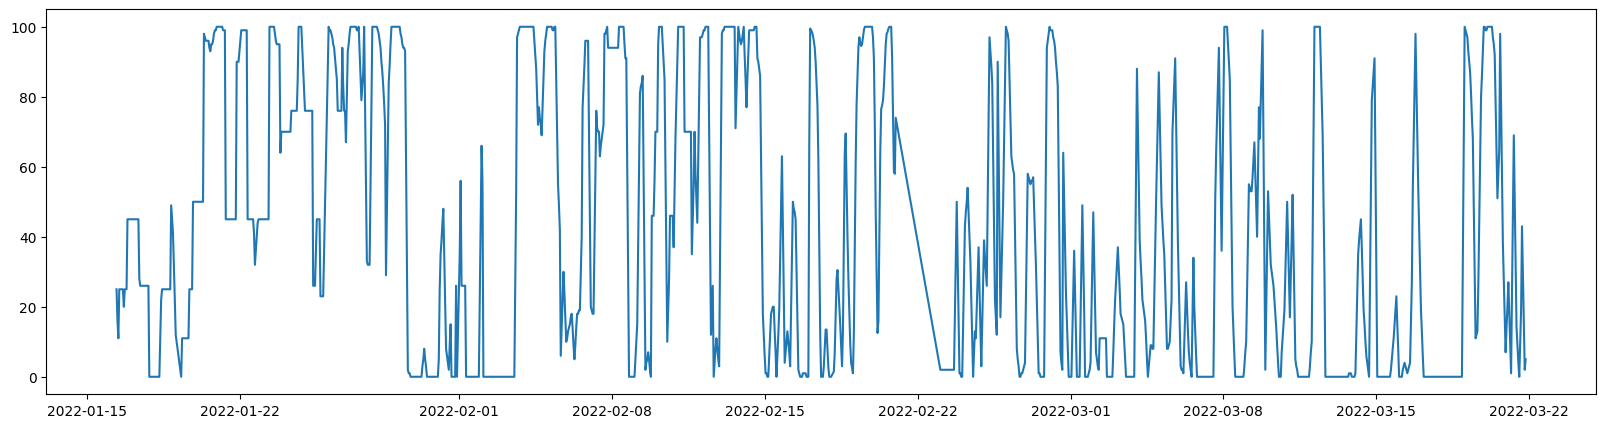

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 5000
fin = 6500
plt.plot(df_copy.loc[ini:fin, "dtHora"], df_copy.loc[ini:fin, "fltCoberturaNubes"])

In [46]:
generacion['fltCoberturaNubes'] = df_copy['fltCoberturaNubes']

### Índice UV

In [47]:
generacion['is_null'] = generacion['fltIndiceUV'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[1, 1, 10, 10, 10, 10, 1, 1]


In [48]:
generacion[generacion['is_null'] == True]

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
3152,2021-10-31 08:00:00,6148,147536,19.794493,9,6148,10,0,99.0,6.0,0.0,34.0,NaN,3,3,7,0.0,10.00,True,2
3168,2021-11-01 00:00:00,6148,147552,0.000000,25,6148,15,0,62.0,11.0,0.0,66.0,NaN,3,4,17,0.0,8.00,True,4
5769,2022-02-17 09:00:00,6257,150153,26492.976997,9,6257,13,0,73.2,2.9,66.8,84.0,NaN,1,2,4,0.0,17.19,True,6
5770,2022-02-17 10:00:00,6257,150154,30000.000000,10,6257,13,0,73.2,2.9,66.8,77.5,NaN,1,2,4,0.0,17.19,True,6
5771,2022-02-17 11:00:00,6257,150155,30000.000000,11,6257,13,0,73.2,2.9,66.8,62.0,NaN,1,2,4,0.0,17.19,True,6
5772,2022-02-17 12:00:00,6257,150156,27077.032067,12,6257,13,0,73.2,2.9,66.8,37.5,NaN,1,2,4,0.0,17.19,True,6
5773,2022-02-17 13:00:00,6257,150157,15641.754878,13,6257,13,0,73.2,2.9,66.8,12.5,NaN,1,2,4,0.0,17.19,True,6
5774,2022-02-17 14:00:00,6257,150158,25989.185638,14,6257,13,0,73.2,2.9,66.8,0.0,NaN,1,2,4,0.0,17.19,True,6
5775,2022-02-17 15:00:00,6257,150159,25925.602738,15,6257,13,0,73.2,2.9,66.8,0.0,NaN,1,2,4,0.0,17.19,True,6
5776,2022-02-17 16:00:00,6257,150160,24525.962623,16,6257,13,0,73.2,2.9,66.8,0.0,NaN,1,2,4,0.0,17.19,True,6


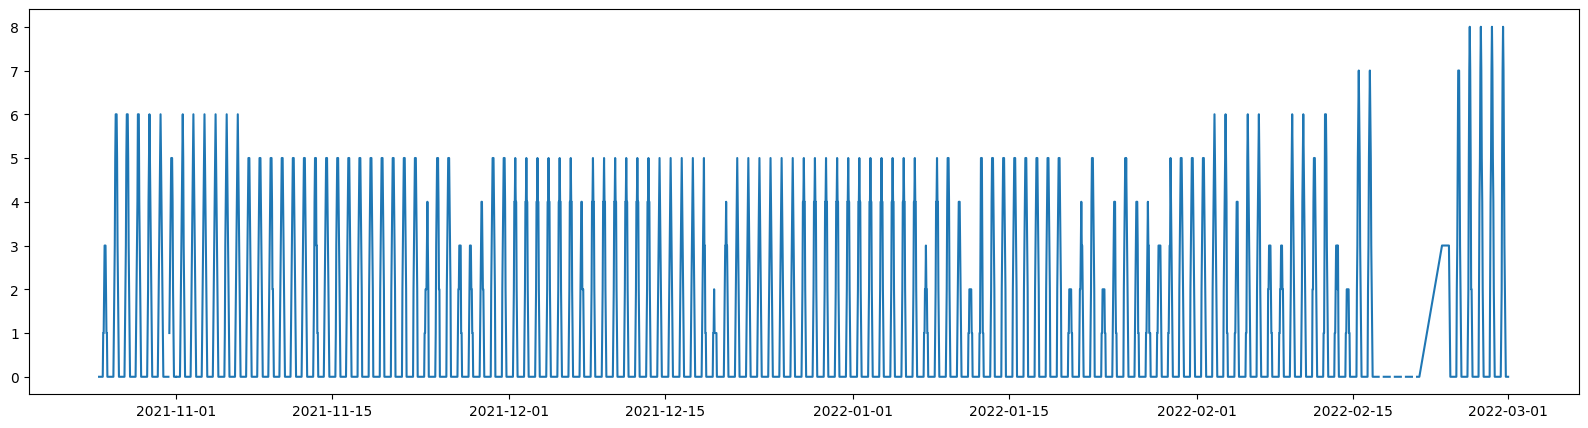

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 3000
fin = 6000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltIndiceUV"])

Son huecos pequeños, vamos a interpolar

In [51]:
generacion['fltIndiceUV'] = generacion['fltIndiceUV'].interpolate(method='linear')

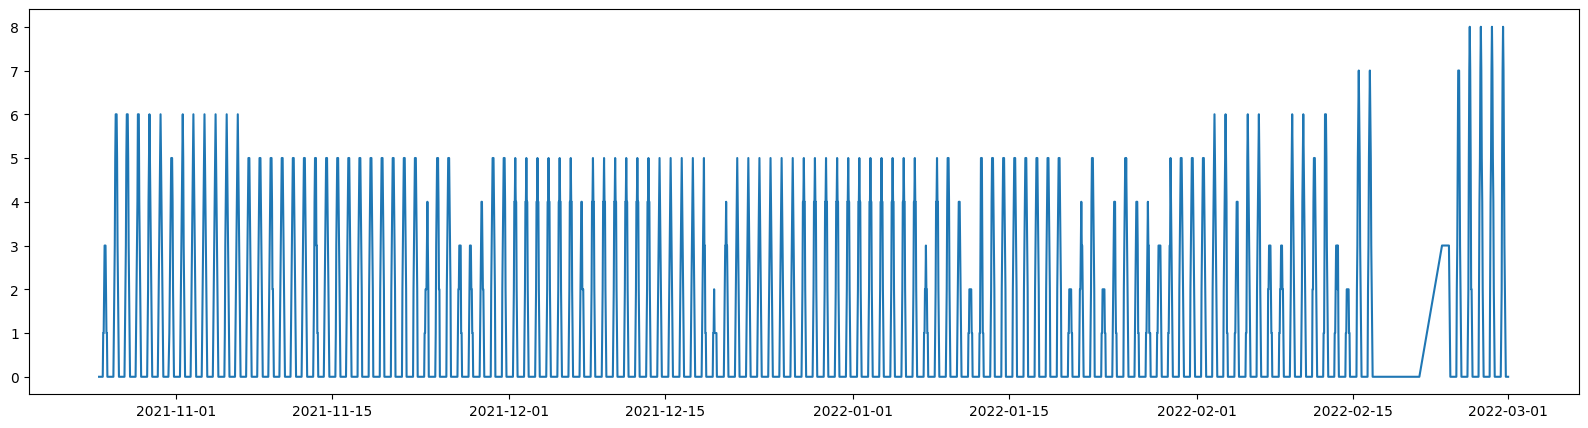

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ini = 3000
fin = 6000
plt.plot(generacion.loc[ini:fin, "dtHora"], generacion.loc[ini:fin, "fltIndiceUV"])

### Eliminación de variables extras

In [54]:
# Eliminar columnas auxiliares
generacion.drop(columns=['is_null', 'group', 'iCodDia.1', 'fltDireccionViento'], inplace=True)

In [55]:
null_counts = generacion.isnull().sum()

# Mostrar los resultados
print(null_counts)

dtHora                   0
iCodDia                  0
iCodHora                 0
fltValPronostico         0
iNumHora                 0
fltTemp                  0
fltProbabilidadLluvia    0
fltHumedadRelativa       0
fltVelocidadViento       0
fltCoberturaNubes        0
fltIndiceUV              0
iCodCondCielo            0
iCodDirViento            0
fltVelocidadRafaga       0
fltPrecipitacion         0
fltDPT                   0
dtype: int64


## Almacenamiento de archivo sin nulos

In [68]:
generacion.to_excel("00.Generación sin nulos.xlsx", header=True, index=False)

## Preprocesamiento al estilo CT-NET

In [69]:
import pandas as pd

generacion = pd.read_excel('Metodologia\Preprocesamiento\Preprocesamiento.xlsx', sheet_name="Datos en conjunto")
generacion.head()

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT
0,2021-06-22 01:00:00,6017,144384,0.0,1,6017,22,95,62.0,9.0,0.0,45.0,0.0,5,4,15,0.0,14.0
1,2021-06-22 02:00:00,6017,144385,0.0,2,6017,21,95,68.0,7.0,0.0,45.0,0.0,5,4,11,0.0,15.0
2,2021-06-22 03:00:00,6017,144386,0.0,3,6017,20,95,74.0,7.0,0.0,45.0,0.0,5,4,9,0.0,16.0
3,2021-06-22 04:00:00,6017,144387,0.0,4,6017,20,95,79.0,7.0,0.0,45.0,0.0,5,3,11,0.0,16.0
4,2021-06-22 05:00:00,6017,144388,0.0,5,6017,20,95,88.0,7.0,0.0,42.0,0.0,5,2,11,0.0,18.0


In [70]:
null_counts = generacion.isnull().sum()

# Mostrar los resultados
print(null_counts)

dtHora                     0
iCodDia                    0
iCodHora                   0
fltValPronostico         385
iNumHora                   0
iCodDia.1                  0
fltTemp                    0
fltProbabilidadLluvia      0
fltHumedadRelativa         2
fltVelocidadViento         0
fltDireccionViento       216
fltCoberturaNubes         96
fltIndiceUV               44
iCodCondCielo              0
iCodDirViento              0
fltVelocidadRafaga         0
fltPrecipitacion           0
fltDPT                     0
dtype: int64


Para cubrir la replicación del artículo CT-NET, donde todos los huecos se llenarán mediante mooving average. Como no especifica los parámetros para configurar el mooving average, lo pondremos en una ventana de 1 año

In [71]:
generacion.drop(columns=['fltDireccionViento'], inplace=True)

In [76]:
import pandas as pd
window_size = 8760

# Aplicar el promedio móvil a la columna con valores nulos
generacion['fltValPronostico'] = generacion['fltValPronostico'].fillna(generacion['fltValPronostico'].rolling(window=window_size, min_periods=1).mean())
generacion['fltHumedadRelativa'] = generacion['fltHumedadRelativa'].fillna(generacion['fltHumedadRelativa'].rolling(window=window_size, min_periods=1).mean())
generacion['fltCoberturaNubes'] = generacion['fltCoberturaNubes'].fillna(generacion['fltCoberturaNubes'].rolling(window=window_size, min_periods=1).mean())
generacion['fltIndiceUV'] = generacion['fltIndiceUV'].fillna(generacion['fltIndiceUV'].rolling(window=window_size, min_periods=1).mean())


In [77]:
generacion.to_excel("00.Generación sin nulos CT-NET.xlsx", header=True, index=False)

## Preprocesamiento al estilo Photovoltaic Power

El artículo comenta que cuando el hueco es de 3 o menos, se interpola linearmente, de lo contrario, se excluye el día entero.

In [94]:
import pandas as pd

generacion = pd.read_excel('Metodologia\Preprocesamiento\Preprocesamiento.xlsx', sheet_name="Datos en conjunto")
generacion.head()

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltDireccionViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT
0,2021-06-22 01:00:00,6017,144384,0.0,1,6017,22,95,62.0,9.0,0.0,45.0,0.0,5,4,15,0.0,14.0
1,2021-06-22 02:00:00,6017,144385,0.0,2,6017,21,95,68.0,7.0,0.0,45.0,0.0,5,4,11,0.0,15.0
2,2021-06-22 03:00:00,6017,144386,0.0,3,6017,20,95,74.0,7.0,0.0,45.0,0.0,5,4,9,0.0,16.0
3,2021-06-22 04:00:00,6017,144387,0.0,4,6017,20,95,79.0,7.0,0.0,45.0,0.0,5,3,11,0.0,16.0
4,2021-06-22 05:00:00,6017,144388,0.0,5,6017,20,95,88.0,7.0,0.0,42.0,0.0,5,2,11,0.0,18.0


In [95]:
generacion.drop(columns=['fltDireccionViento'], inplace=True)

In [96]:
null_counts = generacion.isnull().sum()

# Mostrar los resultados
print(null_counts)

dtHora                     0
iCodDia                    0
iCodHora                   0
fltValPronostico         385
iNumHora                   0
iCodDia.1                  0
fltTemp                    0
fltProbabilidadLluvia      0
fltHumedadRelativa         2
fltVelocidadViento         0
fltCoberturaNubes         96
fltIndiceUV               44
iCodCondCielo              0
iCodDirViento              0
fltVelocidadRafaga         0
fltPrecipitacion           0
fltDPT                     0
dtype: int64


In [97]:
generacion['is_null'] = generacion['fltValPronostico'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[24, 360, 1]


In [102]:
fechas_con_nulos = generacion.loc[generacion['is_null'] == True, 'dtHora'].dt.date.unique()
fechas_con_nulos = [fecha for fecha in fechas_con_nulos if fecha != pd.Timestamp(2022, 4, 4).date()]

In [104]:
generacion['is_null'] = generacion['fltCoberturaNubes'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[96]


In [105]:
# Obtener las nuevas fechas donde generacion['is_null'] == True
nuevas_fechas = generacion.loc[generacion['is_null'] == True, 'dtHora'].dt.date.unique()

# Combinar las fechas con las ya existentes en 'fechas_con_nulos'
fechas_con_nulos = list(set(fechas_con_nulos) | set(nuevas_fechas))

# Mostrar las fechas únicas actualizadas
print(fechas_con_nulos)


[datetime.date(2021, 10, 3), datetime.date(2021, 9, 29), datetime.date(2021, 9, 28), datetime.date(2021, 9, 26), datetime.date(2021, 9, 25), datetime.date(2021, 8, 24), datetime.date(2022, 2, 18), datetime.date(2021, 9, 22), datetime.date(2021, 10, 2), datetime.date(2021, 9, 24), datetime.date(2021, 9, 30), datetime.date(2022, 2, 20), datetime.date(2021, 8, 25), datetime.date(2021, 10, 5), datetime.date(2021, 10, 6), datetime.date(2021, 9, 21), datetime.date(2021, 9, 23), datetime.date(2021, 10, 1), datetime.date(2021, 9, 27), datetime.date(2021, 10, 4), datetime.date(2022, 2, 17), datetime.date(2022, 2, 19), datetime.date(2022, 2, 21)]


In [106]:
generacion['is_null'] = generacion['fltIndiceUV'].isna()
generacion['group'] = (generacion['is_null'] != generacion['is_null'].shift()).cumsum()

# Filtrar solo los grupos de nulos y contar su tamaño
huecos = generacion[generacion['is_null']].groupby('group').size()

# Mostrar resultado
print(huecos.tolist())  # Lista con los tamaños de cada hueco

[1, 1, 10, 10, 10, 10, 1, 1]


In [108]:
# Obtener las nuevas fechas donde generacion['is_null'] == True
nuevas_fechas = generacion.loc[generacion['is_null'] == True, 'dtHora'].dt.date.unique()
nuevas_fechas

array([datetime.date(2021, 10, 31), datetime.date(2021, 11, 1),
       datetime.date(2022, 2, 17), datetime.date(2022, 2, 18),
       datetime.date(2022, 2, 19), datetime.date(2022, 2, 20),
       datetime.date(2022, 10, 30), datetime.date(2022, 10, 31)],
      dtype=object)

In [109]:

fechas_con_nulos = [fecha for fecha in fechas_con_nulos if fecha != pd.Timestamp(2021, 10, 31).date()]
fechas_con_nulos = [fecha for fecha in fechas_con_nulos if fecha != pd.Timestamp(2021, 11, 1).date()]
fechas_con_nulos = [fecha for fecha in fechas_con_nulos if fecha != pd.Timestamp(2022, 10, 30).date()]
fechas_con_nulos = [fecha for fecha in fechas_con_nulos if fecha != pd.Timestamp(2022, 10, 31).date()]

In [110]:
# Combinar las fechas con las ya existentes en 'fechas_con_nulos'
fechas_con_nulos = list(set(fechas_con_nulos) | set(nuevas_fechas))

# Mostrar las fechas únicas actualizadas
fechas_con_nulos

[datetime.date(2021, 10, 3),
 datetime.date(2021, 9, 29),
 datetime.date(2021, 9, 28),
 datetime.date(2022, 10, 30),
 datetime.date(2021, 9, 26),
 datetime.date(2022, 10, 31),
 datetime.date(2021, 9, 25),
 datetime.date(2021, 8, 24),
 datetime.date(2022, 2, 18),
 datetime.date(2021, 11, 1),
 datetime.date(2021, 9, 22),
 datetime.date(2022, 2, 20),
 datetime.date(2021, 10, 2),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 9, 24),
 datetime.date(2021, 10, 31),
 datetime.date(2021, 8, 25),
 datetime.date(2021, 10, 5),
 datetime.date(2021, 10, 6),
 datetime.date(2021, 9, 21),
 datetime.date(2021, 9, 23),
 datetime.date(2021, 10, 1),
 datetime.date(2021, 9, 27),
 datetime.date(2021, 10, 4),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 21)]

In [111]:
# Filtrar el DataFrame eliminando las filas con fechas en 'fechas_con_nulos'
generacion_filtrado = generacion[~generacion['dtHora'].dt.date.isin(fechas_con_nulos)]
generacion_filtrado

,dtHora,iCodDia,iCodHora,fltValPronostico,iNumHora,iCodDia.1,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,is_null,group
0,2021-06-22 01:00:00,6017,144384,0.0,1,6017,22,95,62.0,9.0,45.0,0.0,5,4,15,0.0,14.0,False,1
1,2021-06-22 02:00:00,6017,144385,0.0,2,6017,21,95,68.0,7.0,45.0,0.0,5,4,11,0.0,15.0,False,1
2,2021-06-22 03:00:00,6017,144386,0.0,3,6017,20,95,74.0,7.0,45.0,0.0,5,4,9,0.0,16.0,False,1
3,2021-06-22 04:00:00,6017,144387,0.0,4,6017,20,95,79.0,7.0,45.0,0.0,5,3,11,0.0,16.0,False,1
4,2021-06-22 05:00:00,6017,144388,0.0,5,6017,20,95,88.0,7.0,42.0,0.0,5,2,11,0.0,18.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28676,2024-10-02 20:00:00,7215,173156,0.0,20,7215,22,0,45.0,20.0,2.0,0.0,1,4,37,0.0,9.0,False,17
28677,2024-10-02 21:00:00,7215,173157,0.0,21,7215,20,0,54.0,19.0,1.0,0.0,1,4,39,0.0,10.0,False,17
28678,2024-10-02 22:00:00,7215,173158,0.0,22,7215,18,0,62.0,19.0,0.0,0.0,1,4,41,0.0,11.0,False,17
28679,2024-10-02 23:00:00,7215,173159,0.0,23,7215,17,0,69.0,15.0,0.0,0.0,1,4,32,0.0,11.0,False,17


In [112]:
generacion_filtrado.to_excel("00.Generación sin nulos Photovoltaic.xlsx", header=True, index=False)